In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
analysis = pd.merge(mouse_metadata, study_results, on= 'Mouse ID')

# Display a preview of the data
analysis.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = analysis.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = analysis.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = analysis.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = analysis.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = analysis.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

statistics_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, 
                          "SEM": sem})
statistics_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


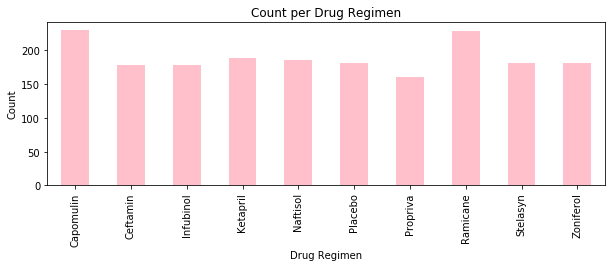

In [33]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

datapoints_df = pd.DataFrame(analysis.groupby(["Drug Regimen"]).count()).reset_index()
regimen_datapoints = datapoints_df[["Drug Regimen","Mouse ID"]]
regimen_datapoints = regimen_datapoints.rename(columns={"Mouse ID": "Count"})
regimen_datapoints = regimen_datapoints.set_index("Drug Regimen")

regimen_datapoints.plot(kind="bar", color="pink",figsize=(10,3), legend=None)
plt.title("Count per Drug Regimen")
plt.ylabel("Count")
plt.xlabel("Drug Regimen")

plt.show()

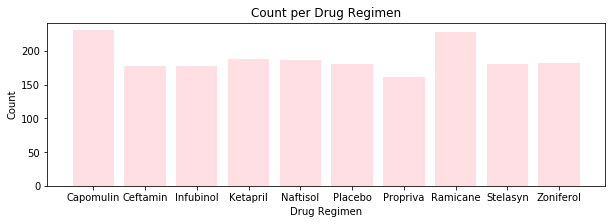

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

drug_regimens = statistics_df.index.tolist()
drug_regimens

regimen_count = (analysis.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
regimen_count

x_axis = drug_regimens

plt.figure(figsize=(10,3))
plt.bar(x_axis, regimen_count, color="pink", alpha=0.5)
plt.title("Count per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

plt.show()

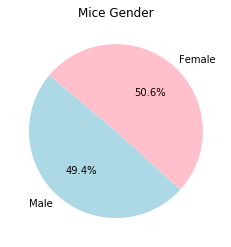

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_df = pd.DataFrame(analysis.groupby(["Sex"]).count()).reset_index()
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})

labels = ["Male", "Female"]
colors = ["LightBlue", "Pink"]
gender_df.plot(kind="pie", labels=labels, y= "Count", colors=colors, 
        autopct="%1.1f%%", legend=None, shadow=False, startangle=140)

plt.title("Mice Gender")
plt.ylabel("")
labels=None

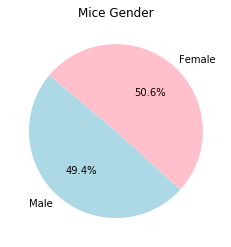

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_count = (analysis.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count

labels = ["Male", "Female"]
colors = ["LightBlue", "Pink"]
plt.pie(gender_count, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=140)

plt.title("Mice Gender")
plt.ylabel("")
labels=None

In [40]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.



The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of temperatures is: 30.981175224999998
The upper quartile of temperatures is: 38.508305307499995
The interquartile range of temperatures is: 7.527130082499998
The the median of temperatures is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


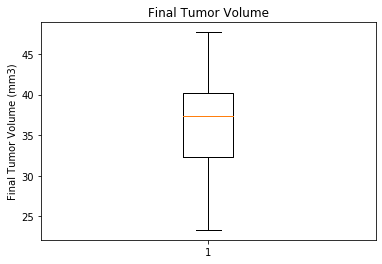

In [42]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cap_list)
plt.show()

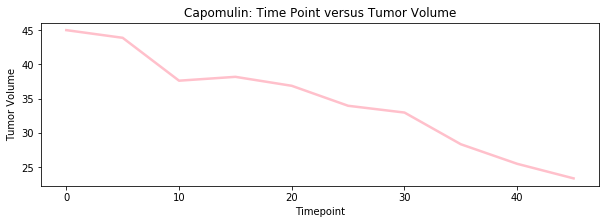

In [48]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_df = analysis.loc[analysis["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

cap_single_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
cap_single_df

cap_single_df = cap_single_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]

cap_single_df = cap_single_df.reset_index(drop=True)

cap_single_df.set_index('Timepoint').plot(figsize=(10, 3), linewidth=2.5, legend=None, color='Pink')

plt.title("Capomulin: Time Point versus Tumor Volume")
plt.ylabel("Tumor Volume")
labels=None

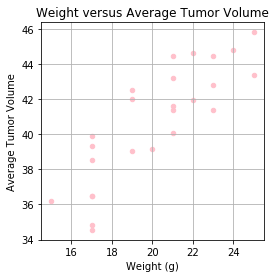

In [52]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_df.head()

reduced_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
reduced_df.head()

average_cap = pd.DataFrame(reduced_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average_cap.head()

average_cap = average_cap.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume"})
average_cap.head()

average_cap = average_cap.set_index('Mouse ID')

average_cap.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume", grid=True, figsize=(4,4),
              title="Weight versus Average Tumor Volume", color="Pink")
plt.show()

The correlation between both factors is 0.84


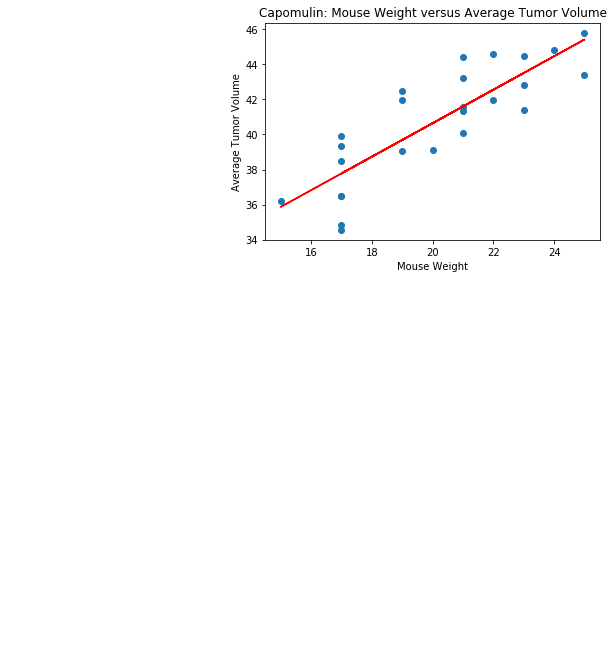

In [57]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress

mouse_weight = average_cap.iloc[:,0]
avg_tumor_volume = average_cap.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

x_values = average_cap['Weight (g)']
y_values = average_cap['Average Tumor Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="pink")
plt.title("Capomulin: Mouse Weight versus Average Tumor Volume")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()